In [ ]:
product_sales <- read.csv("C:\\Users\\Mohammed Arshan\\Downloads\\product_sales.csv")

library(tidyverse)
library(skimr)
library(reshape2)
library(usmap)
library(ggeasy)
library(SmartEDA)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



In [ ]:
head(product_sales)

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
,<int>,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<chr>
1,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NA,0,24,Arizona
2,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
3,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
4,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NA,3,25,Indiana
5,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois
6,6,Call,6489e678-40f2-4fed-a48e-d0dff9c09205,13,65.01,10,24,Mississippi


In [ ]:
ExpData(product_sales, type=2)

Index,Variable_Name,Variable_Type,Sample_n,Missing_Count,Per_of_Missing,No_of_distinct_values
<dbl>,<chr>,<chr>,<int>,<int>,<dbl>,<int>
1,week,integer,15000,0,0.000,6
2,sales_method,character,15000,0,0.000,5
3,customer_id,character,15000,0,0.000,15000
4,nb_sold,integer,15000,0,0.000,10
5,revenue,numeric,13926,1074,0.072,6743
6,years_as_customer,integer,15000,0,0.000,42
7,nb_site_visits,integer,15000,0,0.000,27
8,state,character,15000,0,0.000,50


In [ ]:
product_sales["sales_method"][product_sales["sales_method"] == "em + call"] <- 'Email + Call'
product_sales["sales_method"][product_sales["sales_method"] == "email"] <- 'Email'

Warning message:
“Removed 1074 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 1074 rows containing non-finite values (`stat_boxplot()`).”


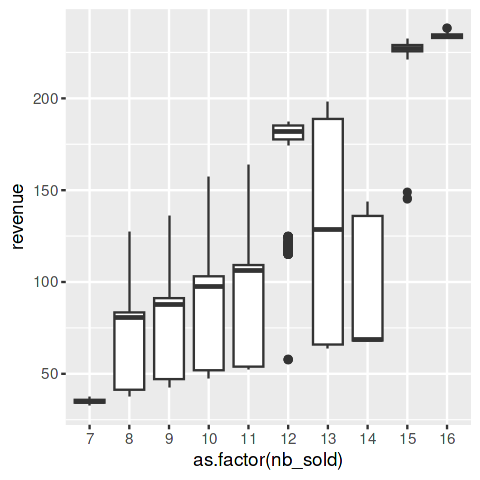

Warning message:
“Removed 1074 rows containing non-finite values (`stat_boxplot()`).”


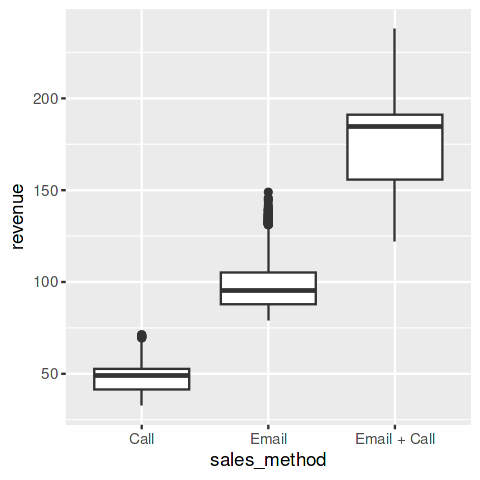

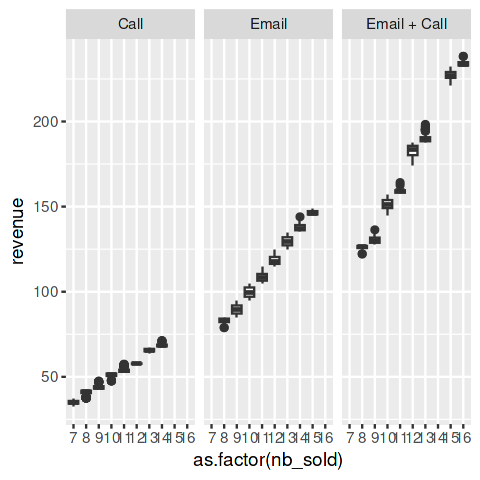

In [ ]:
options(repr.plot.width = 4, repr.plot.height = 4)
ggplot(data = product_sales, aes (x = as.factor(nb_sold), y = revenue))+
  geom_boxplot()
ggplot(data = product_sales, aes (x = sales_method, y = revenue ))+
  geom_boxplot()
ggplot(data = product_sales, aes (x = as.factor(nb_sold), y = revenue ))+
  geom_boxplot()+
  facet_grid(~sales_method)

In [ ]:
product_sales$nb_sold<-as.factor(product_sales$nb_sold)

means <- product_sales %>%
  group_by(sales_method, nb_sold) %>%
  summarise(mean = mean(revenue, na.rm = TRUE))



product_sales <-product_sales %>%
  mutate(revenue = case_when((is.na(revenue) & sales_method == "Call" & nb_sold == 7) ~ means$mean[1],
                              (is.na(revenue) & sales_method == "Call" & nb_sold == 8) ~ means$mean[2],
                              (is.na(revenue) & sales_method == "Call" & nb_sold == 9) ~ means$mean[3],
                              (is.na(revenue) & sales_method == "Call" & nb_sold == 10) ~ means$mean[4],
                              (is.na(revenue) & sales_method == "Call" & nb_sold == 11) ~ means$mean[5],
                              (is.na(revenue) & sales_method == "Call" & nb_sold == 12) ~ means$mean[6],
                              (is.na(revenue) & sales_method == "Call" & nb_sold == 13) ~ means$mean[7],
                              (is.na(revenue) & sales_method == "Call" & nb_sold == 14) ~ means$mean[8],
                              (is.na(revenue) & sales_method == "Email" & nb_sold == 8) ~ means$mean[9],
                              (is.na(revenue) & sales_method == "Email" & nb_sold == 9) ~ means$mean[10],
                              (is.na(revenue) & sales_method == "Email" & nb_sold == 10) ~ means$mean[11],
                              (is.na(revenue) & sales_method == "Email" & nb_sold == 11) ~ means$mean[12],
                              (is.na(revenue) & sales_method == "Email" & nb_sold == 12) ~ means$mean[13],
                              (is.na(revenue) & sales_method == "Email" & nb_sold == 13) ~ means$mean[14],
                              (is.na(revenue) & sales_method == "Email" & nb_sold == 14) ~ means$mean[15],
                              (is.na(revenue) & sales_method == "Email" & nb_sold == 15) ~ means$mean[16],
                              (is.na(revenue) & sales_method == "Email + Call" & nb_sold == 8) ~ means$mean[17],
                              (is.na(revenue) & sales_method == "Email + Call" & nb_sold == 9) ~ means$mean[18],
                              (is.na(revenue) & sales_method == "Email + Call" & nb_sold == 10) ~ means$mean[19],
                              (is.na(revenue) & sales_method == "Email + Call" & nb_sold == 11) ~ means$mean[20],
                              (is.na(revenue) & sales_method == "Email + Call" & nb_sold == 12) ~ means$mean[21],
                              (is.na(revenue) & sales_method == "Email + Call" & nb_sold == 13) ~ means$mean[22],
                              (is.na(revenue) & sales_method == "Email + Call" & nb_sold == 15) ~ means$mean[23],
                              (is.na(revenue) & sales_method == "Email + Call" & nb_sold == 16) ~ means$mean[24],
                              TRUE ~ revenue))

product_sales$revenue<-round(product_sales$revenue, 2)



`summarise()` has grouped output by 'sales_method'. You can override using the
`.groups` argument.


In [ ]:
product_sales["years_as_customer"][product_sales["years_as_customer"] > 39 ] <- 39

In [ ]:
#Also I will change the week column to factor
product_sales$week<-as.factor(product_sales$week)

In [ ]:
ExpData(product_sales, type=2)

Index,Variable_Name,Variable_Type,Sample_n,Missing_Count,Per_of_Missing,No_of_distinct_values
<dbl>,<chr>,<chr>,<int>,<int>,<dbl>,<int>
1,week,factor,15000,0,0,6
2,sales_method,character,15000,0,0,3
3,customer_id,character,15000,0,0,15000
4,nb_sold,factor,15000,0,0,10
5,revenue,numeric,15000,0,0,6752
6,years_as_customer,numeric,15000,0,0,40
7,nb_site_visits,integer,15000,0,0,27
8,state,character,15000,0,0,50


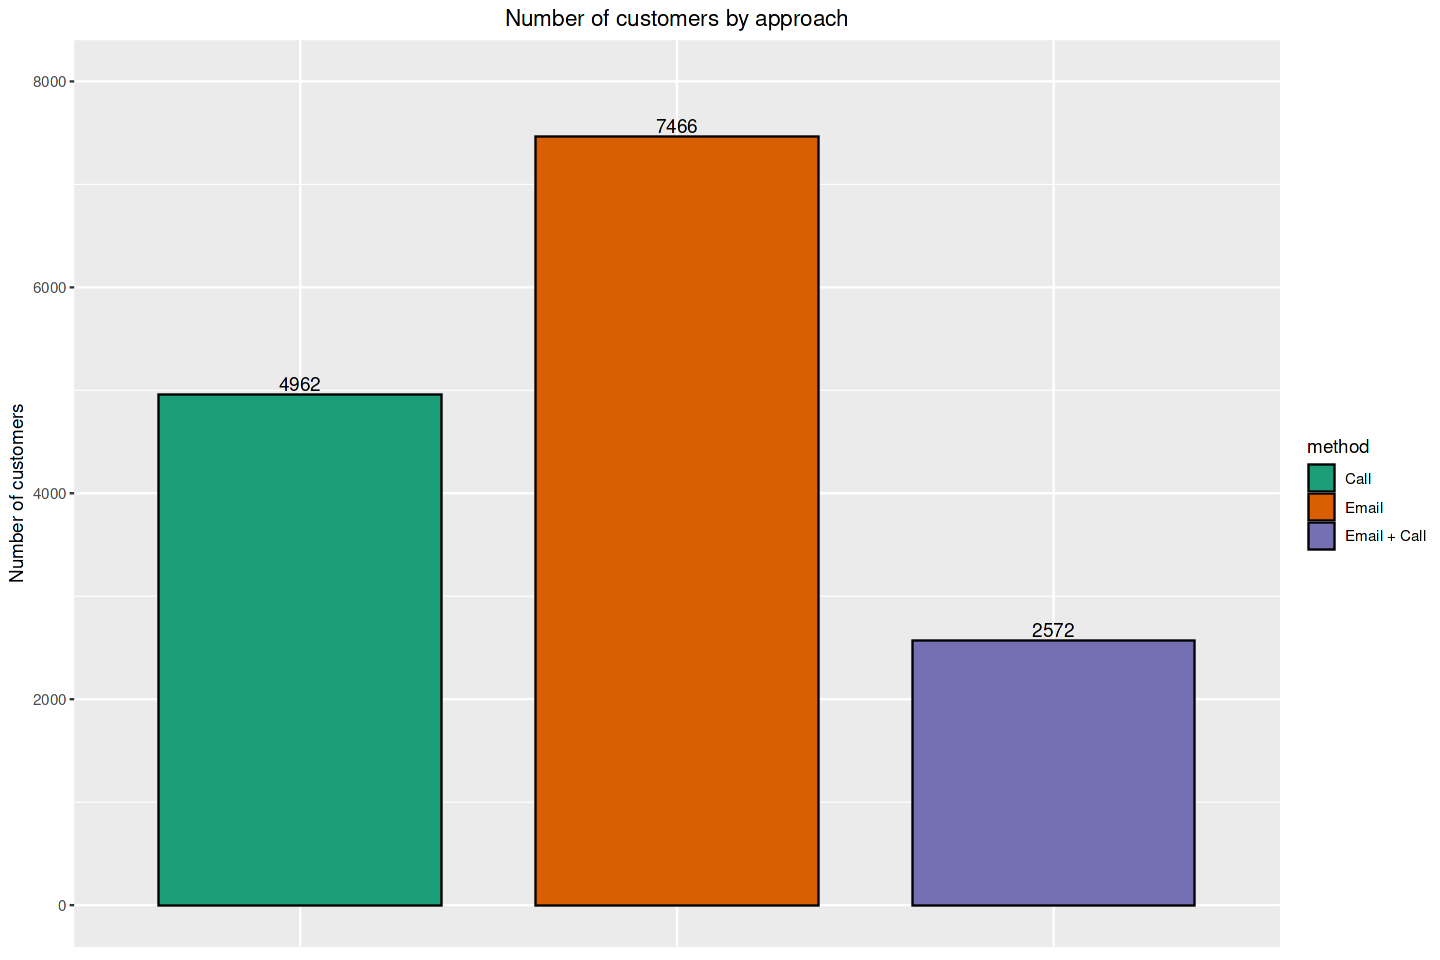

In [ ]:
options(repr.plot.width = 12, repr.plot.height = 8)

customer_for_approach <- product_sales %>%
  select(sales_method) %>%
  count(sales_method) %>%
  arrange(desc(n)) %>%
  rename(method = sales_method,
         customers = n)


ggplot(data = customer_for_approach, aes (x = method, y = customers, fill = method)) +
  geom_bar(stat='identity',
                                         colour = 'black',
                                         width=.75)+
  geom_text(aes(label=customers),
            position=position_dodge(width=0.9),
            vjust=-0.25)+
  ggtitle("Number of customers by approach")+
  theme(plot.title = element_text(hjust = 0.5),
        axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank())+
  ylim(0,8000)+
  ylab("Number of customers")+
  scale_fill_brewer(palette="Dark2")

Warning message:
“Removed 2 rows containing missing values (`geom_bar()`).”


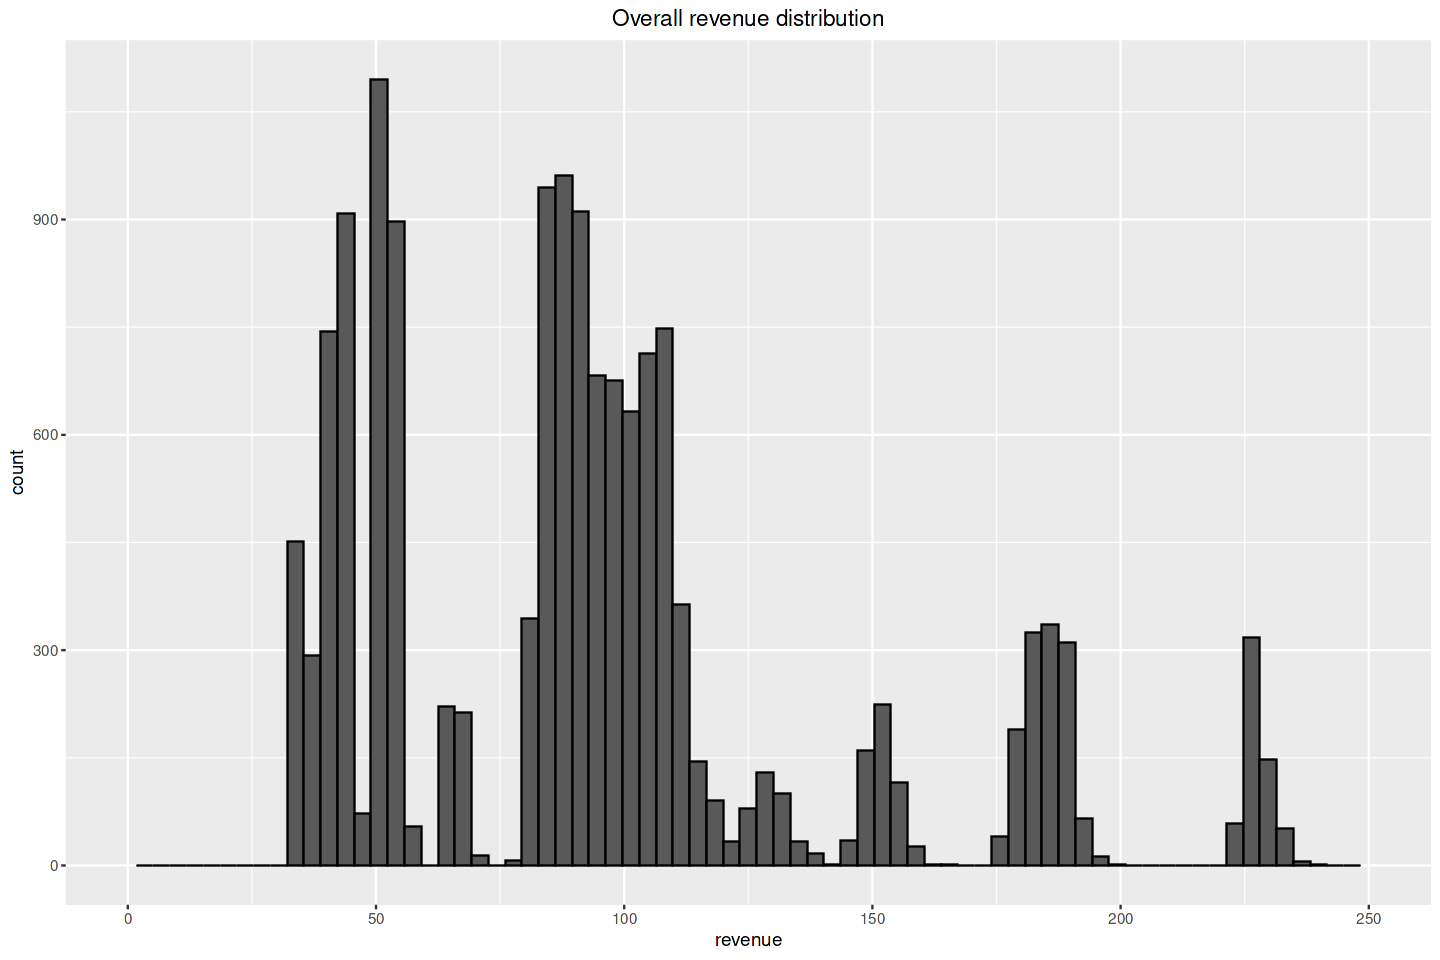

In [ ]:
options(repr.plot.width = 12, repr.plot.height = 8)

ggplot(data = product_sales, aes (x = revenue))+
  geom_histogram(bins = 75, color = "black")+
  ggtitle("Overall revenue distribution")+
  theme(plot.title = element_text(hjust = 0.5))+
  xlim(0,250)

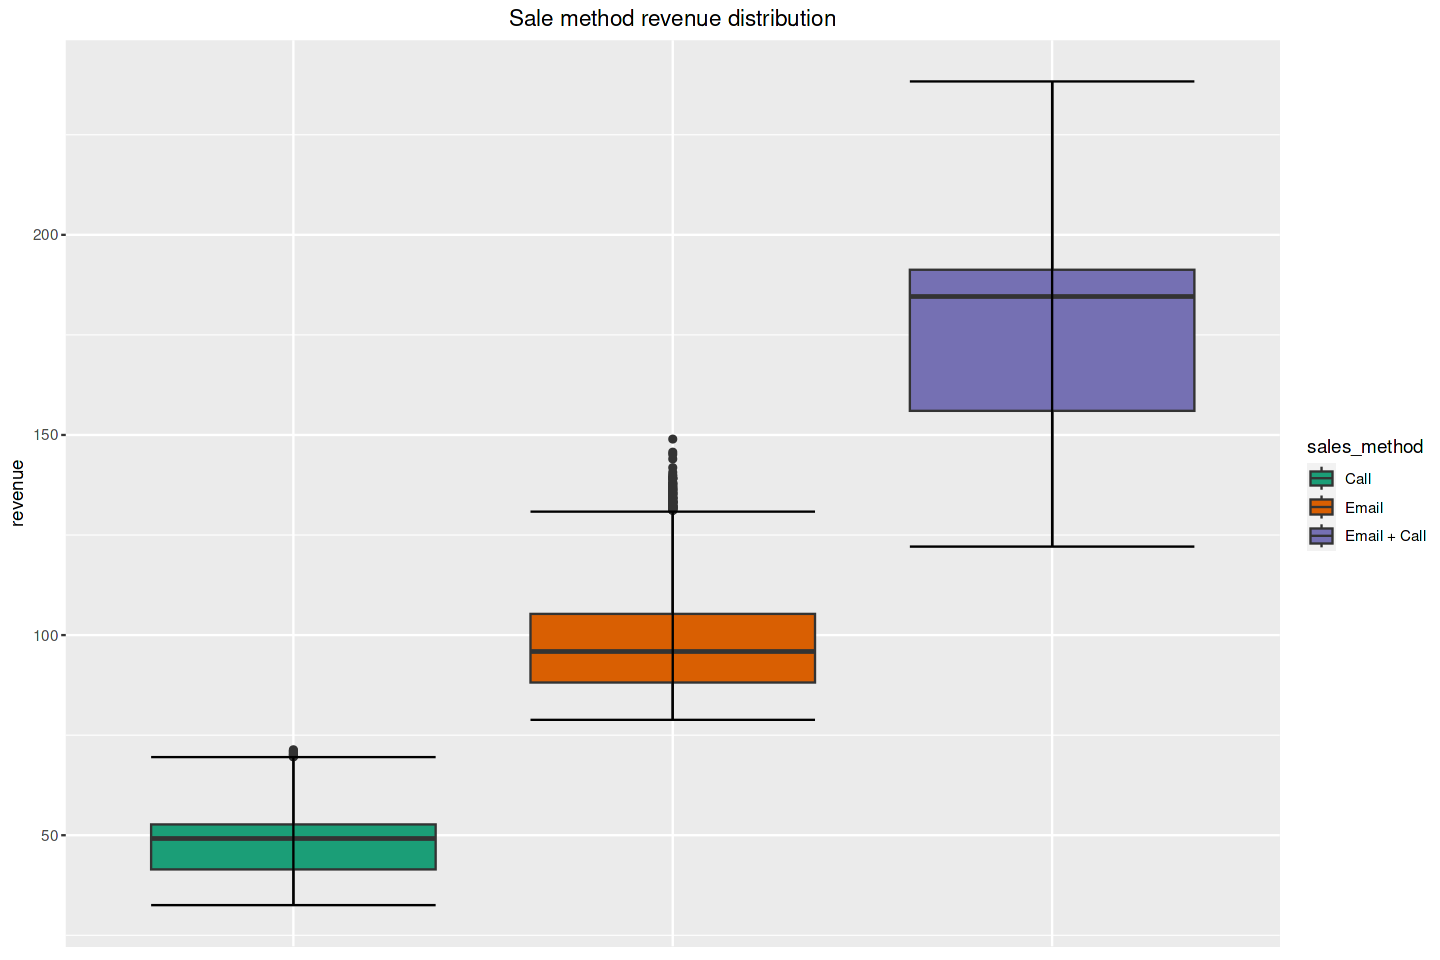

In [ ]:
options(repr.plot.width = 12, repr.plot.height = 8)

ggplot(data = product_sales, aes(x = sales_method, y = revenue, fill = sales_method)) +
  geom_boxplot()+
  ggtitle("Sale method revenue distribution")+
  stat_boxplot(geom="errorbar")+
  theme(plot.title = element_text(hjust = 0.5),
        axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank())+
  scale_fill_brewer(palette="Dark2")

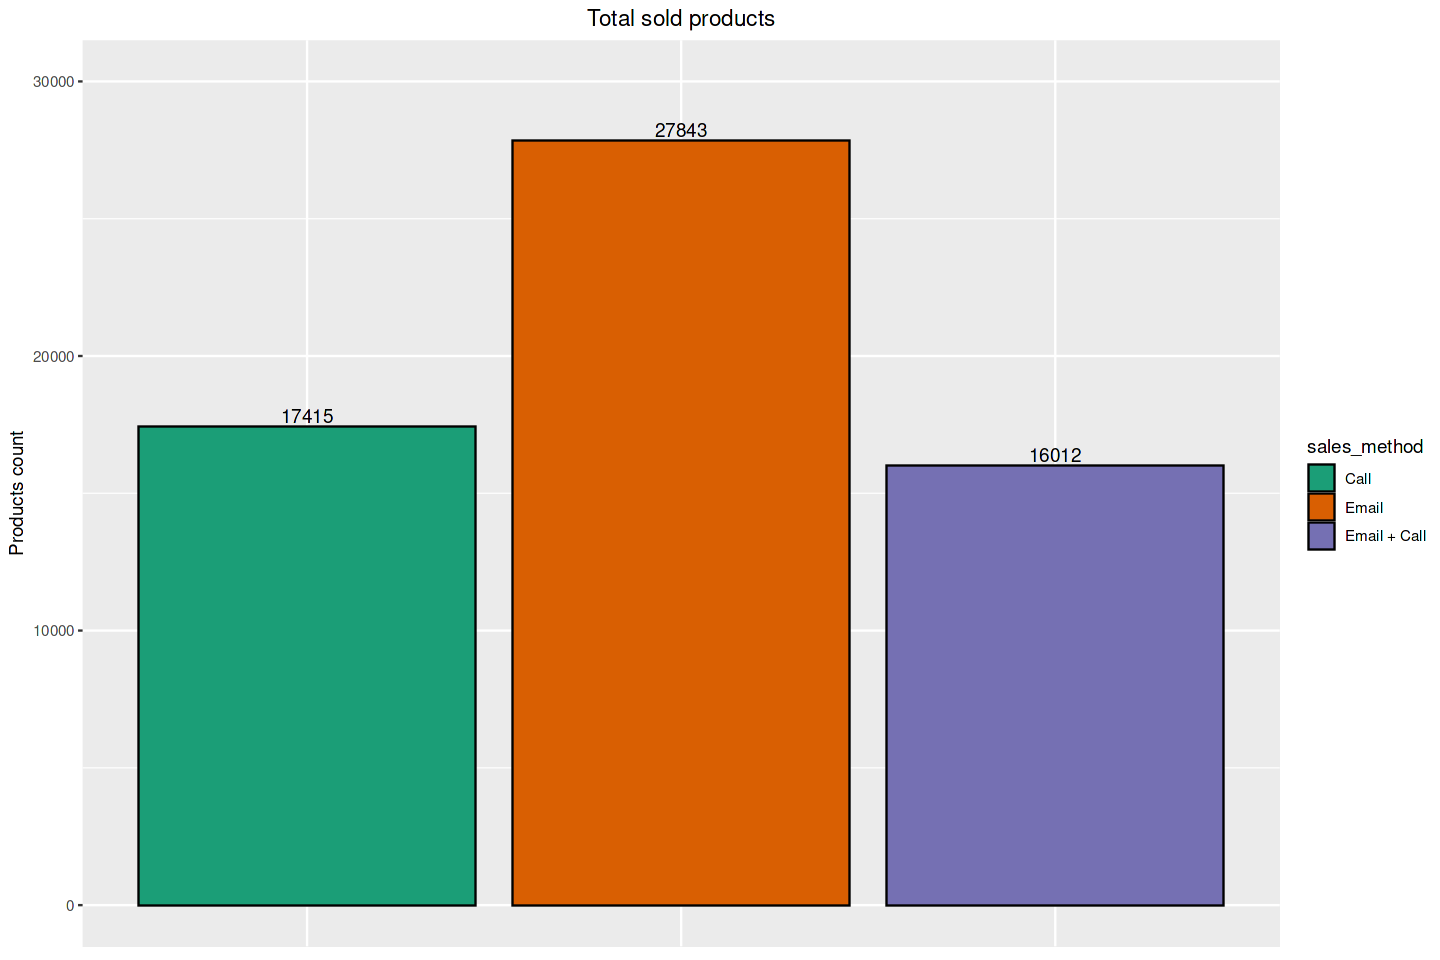

In [ ]:
options(repr.plot.width = 12, repr.plot.height = 8)

product_sales%>%
  group_by(sales_method)%>%
  summarise(total_products = sum(as.numeric(nb_sold)))%>%
  ggplot( aes(x =sales_method, y = total_products, fill = sales_method))+
  geom_bar(stat = 'identity', color = 'black')+
  geom_text(aes(label=total_products),
            position=position_dodge(width=0.9),
            vjust=-0.25)+
  ggtitle("Total sold products")+
  theme(plot.title = element_text(hjust = 0.5),
        axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank())+
  ylab("Products count")+
  ylim(0,30000)+
  scale_fill_brewer(palette="Dark2")

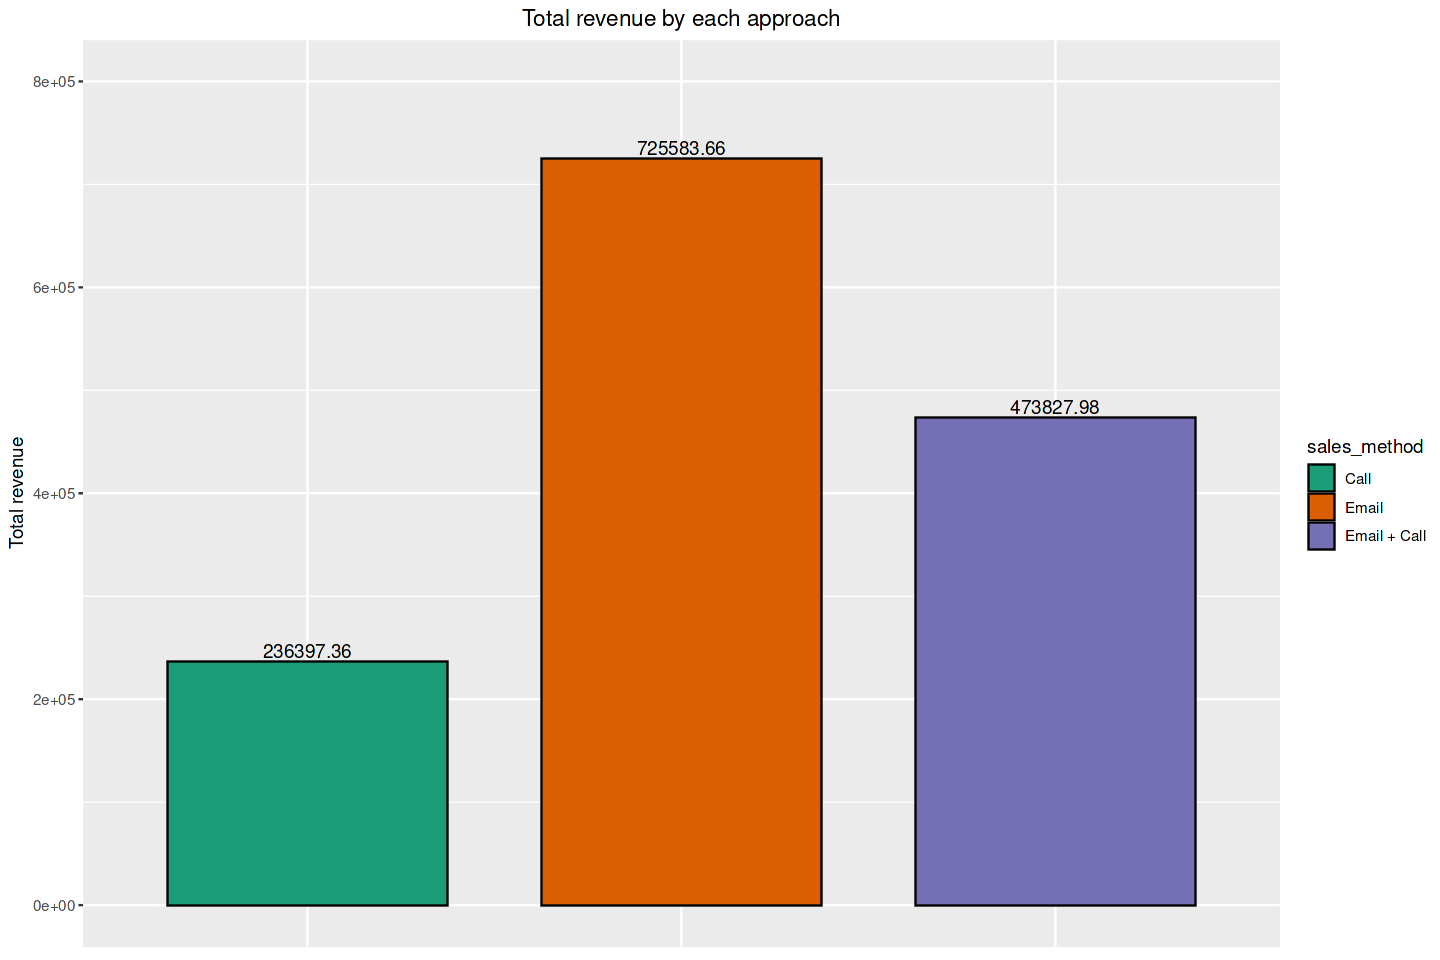

In [ ]:
options(repr.plot.width = 12, repr.plot.height = 8)

product_sales %>%
  group_by(sales_method) %>%
  summarise(total_revenue = sum(revenue))%>%
  ggplot(aes(x=sales_method ,y= round(total_revenue), fill = sales_method))+
  geom_bar(stat='identity',
         colour = 'black',
         width=.75)+
  geom_text(aes(label=total_revenue),
            position=position_dodge(width=0.9),
            vjust=-0.25)+
  ggtitle("Total revenue by each approach")+
  theme(plot.title = element_text(hjust = 0.5),
        axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank())+
  ylab("Total revenue")+
  ylim(0,800000)+
  scale_fill_brewer(palette="Dark2")


`summarise()` has grouped output by 'sales_method'. You can override using the
`.groups` argument.


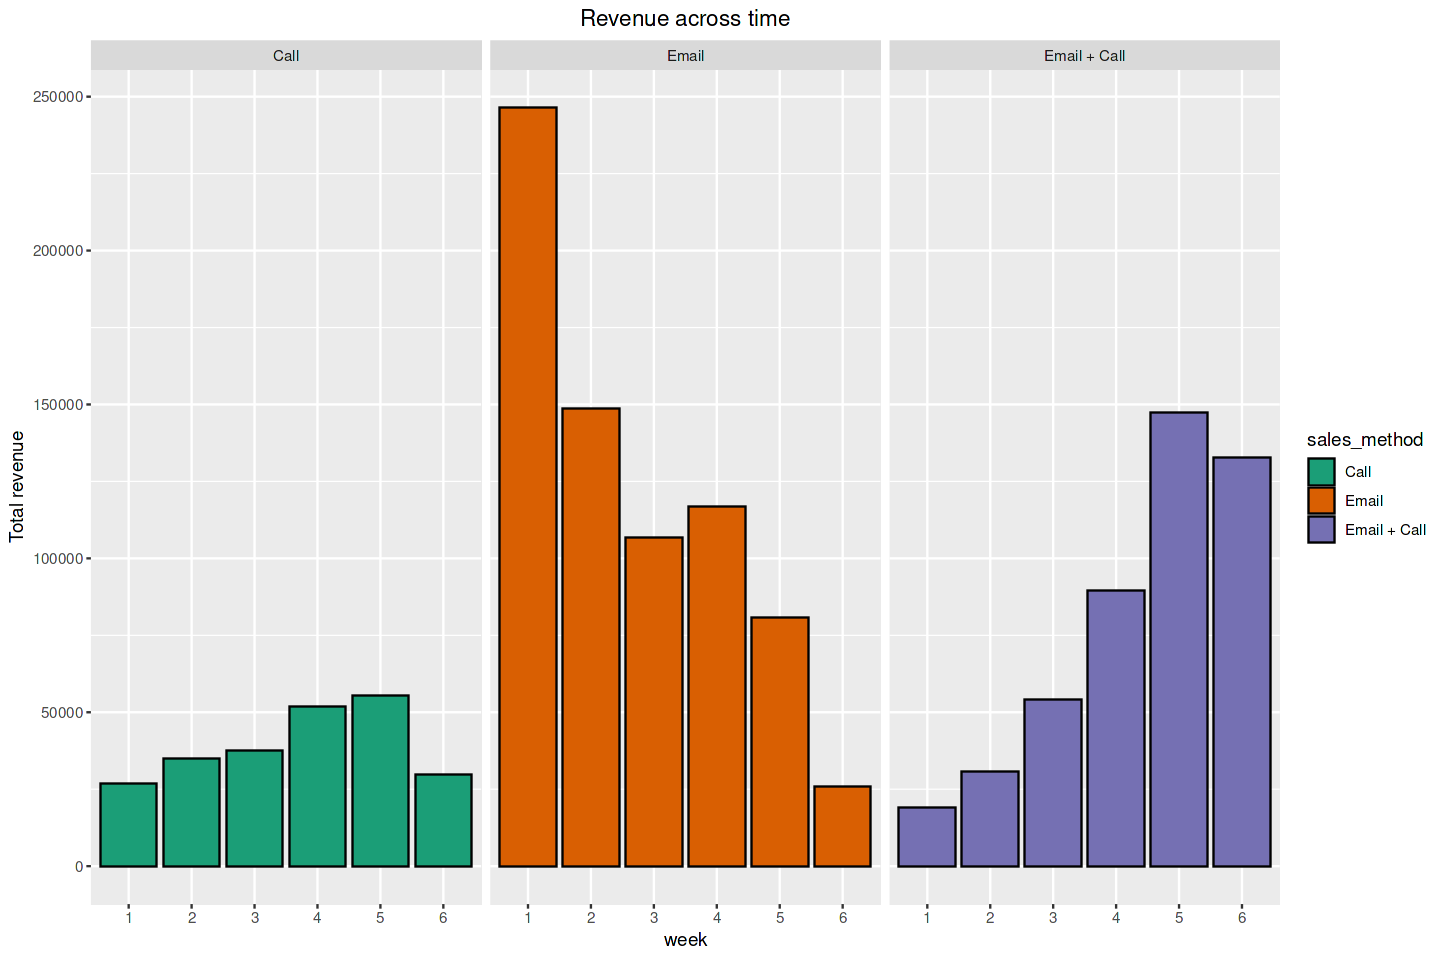

In [ ]:
options(repr.plot.width = 12, repr.plot.height = 8)

product_sales%>%
  group_by(sales_method, week)%>%
  summarise(revenue = sum(revenue))%>%
  ggplot(aes (x= week, y = revenue, fill = sales_method))+
  geom_bar(stat = 'identity', color = 'black')+
  facet_grid(~sales_method)+
  scale_fill_brewer(palette="Dark2")+
  ggtitle("Revenue across time")+
  theme(plot.title = element_text(hjust = 0.5))+
  ylab("Total revenue")

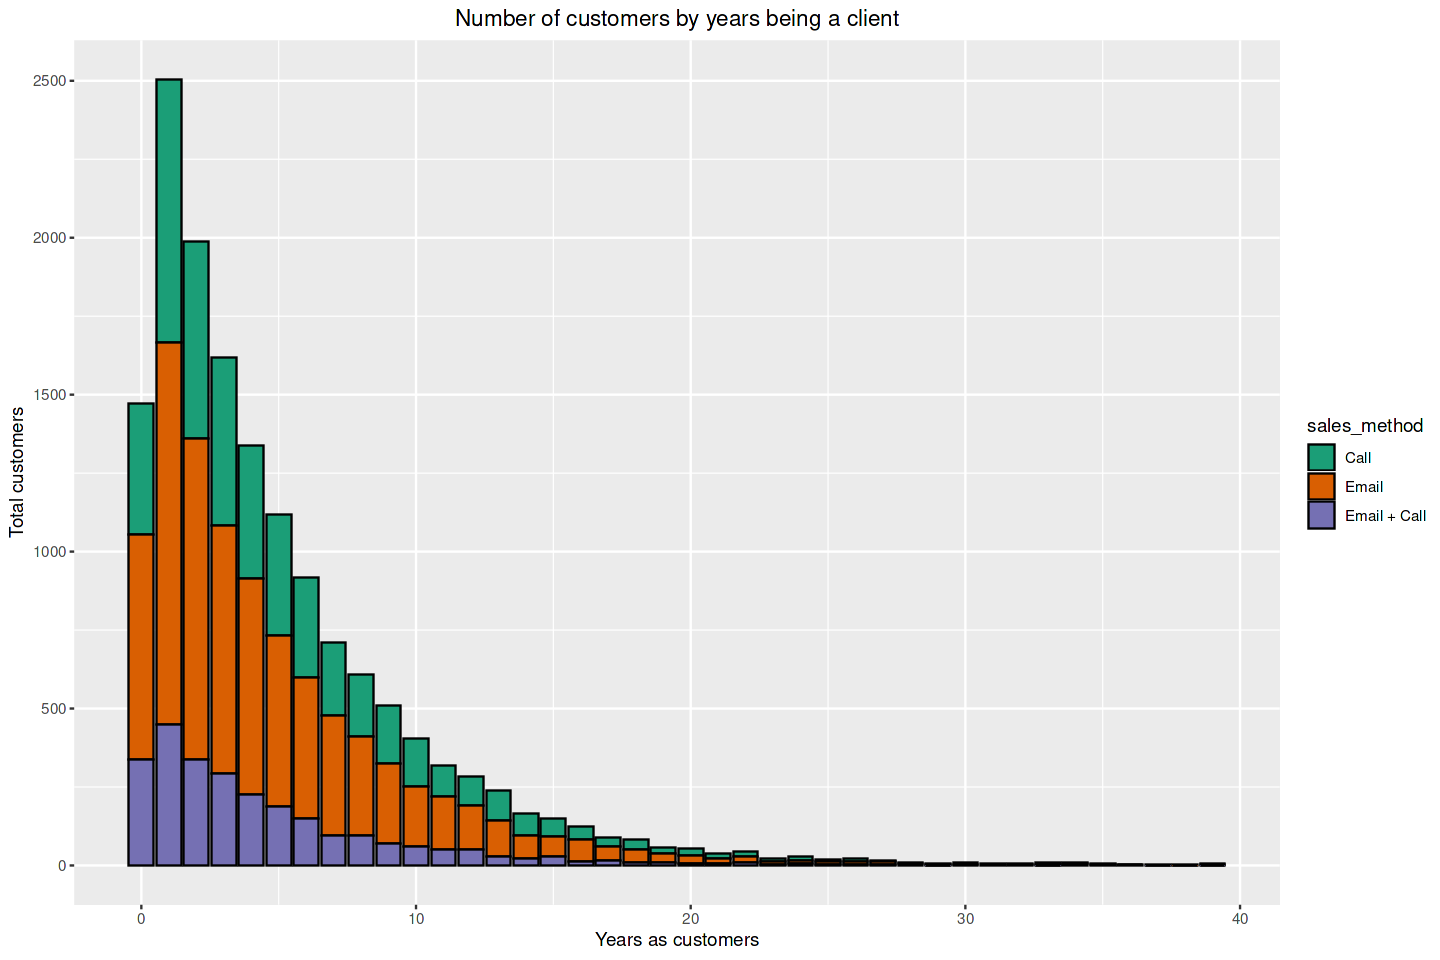

In [ ]:
options(repr.plot.width = 12, repr.plot.height = 8)

product_sales%>%
  count(sales_method, years_as_customer)%>%
  ggplot()+
geom_bar(aes(x = years_as_customer, y = n, fill = sales_method), stat = 'identity', color = 'black')+
  scale_fill_brewer(palette="Dark2")+
  ggtitle("Number of customers by years being a client")+
  theme(plot.title = element_text(hjust = 0.5))+
  ylab("Total customers")+
  xlab("Years as customers")

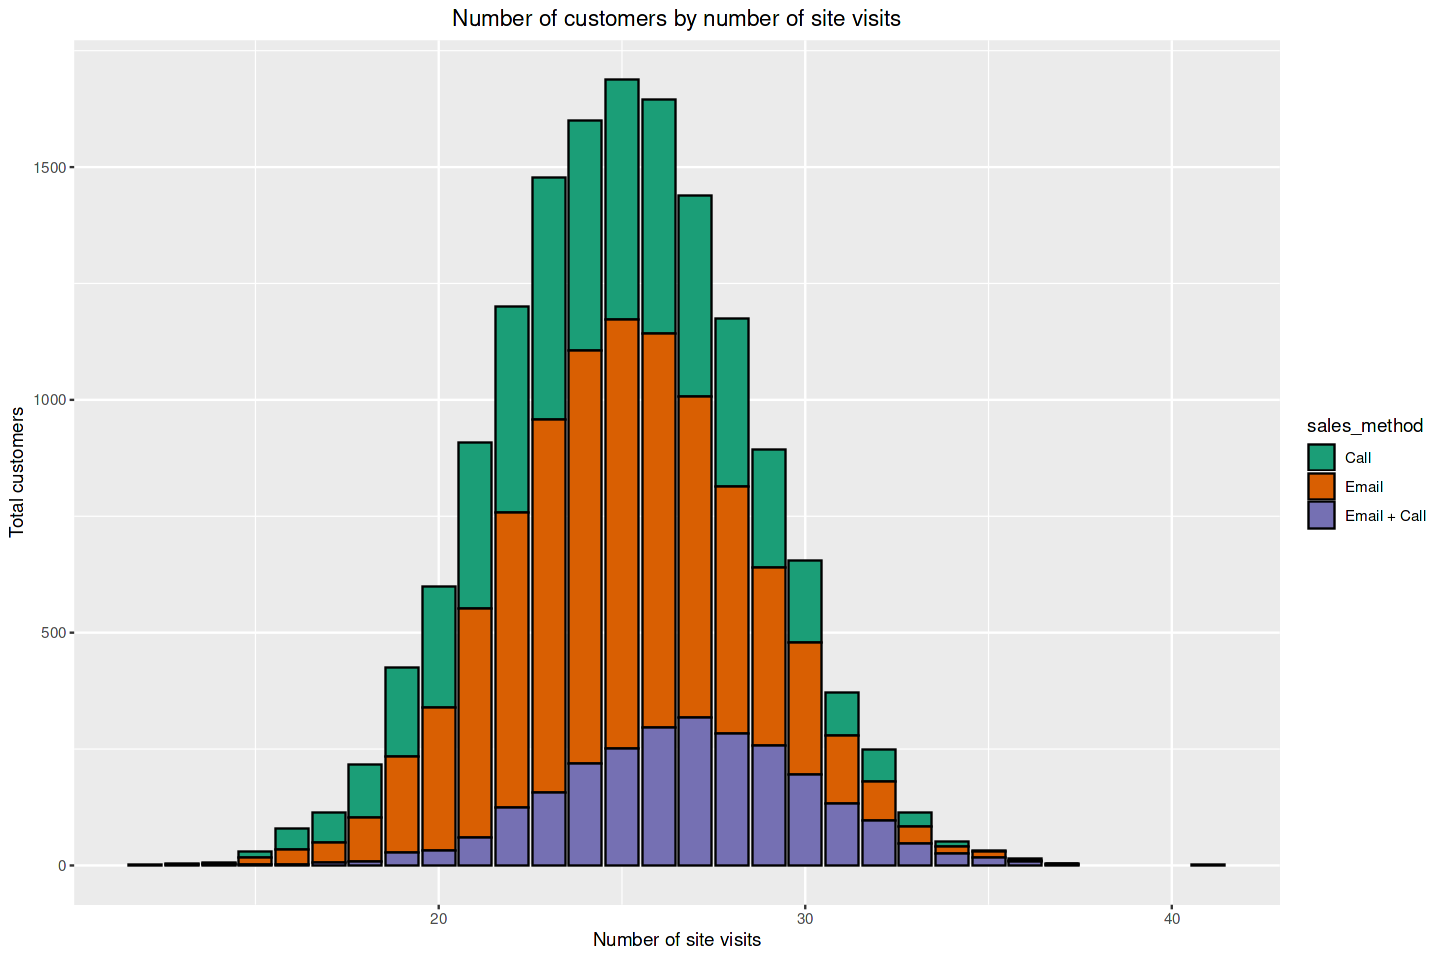

In [ ]:
options(repr.plot.width = 12, repr.plot.height = 8)

product_sales%>%
  count(sales_method, nb_site_visits)%>%
  ggplot()+
  geom_bar(aes(x = nb_site_visits, y = n, fill = sales_method), stat = 'identity', color = 'black')+
  scale_fill_brewer(palette="Dark2")+
  ggtitle("Number of customers by number of site visits")+
  theme(plot.title = element_text(hjust = 0.5))+
  ylab("Total customers")+
  xlab("Number of site visits")